In [1]:
from gene_viz.data_loader import load_data

from gene_viz.utils import get_data_path, load_mesh_geometry
import os

import matplotlib.pyplot as plt
from gene_viz.interpolation.load_interpolate_to_mri import plot_volumetrics, plot_volumetrics_alpha, interpolate_expression_3d, make_3d_interpolated_grid_mni, get_point_density

import pandas as pd
import numpy as np
import nibabel as nb


In [2]:
# Load gene expression data - Konrad

gene_name = 'PVALB'

coords, samples = load_data(gene_name)

In [4]:
# Select the gene - Konrad
#done

In [ ]:
# Specify gene name - Konrad
#done

In [3]:
# Load in meshes - Konrad, Lena

cortical_mesh_file_path = os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii')
mesh = load_mesh_geometry(cortical_mesh_file_path)

In [4]:
# Interpolate gene data to meshes - Konrad, Lena

from gene_viz.interpolation.interpolation_core import interpolate
interpolated_values = interpolate(samples,coords, mesh['coords'])

print(interpolated_values)

[0.5976765  0.75316501 0.83007844 ... 0.57111341 0.63357538 0.53351962]


In [ ]:
# Load in MRI - Jack
#done

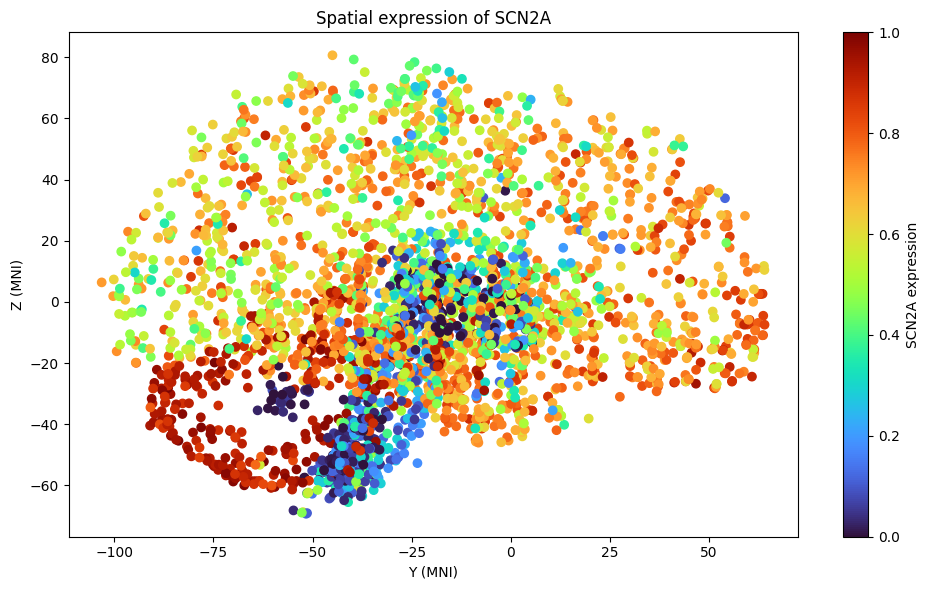

In [5]:
# Interpolate gene data to MRI slice - Jack

# --- Set up paths ---
directory1 = '../michack_project_data'
os.makedirs(directory1, exist_ok=True)

# Cached CSV file paths
expression_file = os.path.join(directory1, 'point_expression_data.csv')
coords_file = os.path.join(directory1, 'coords_data.csv')
struct_file = os.path.join(directory1, 'struct_data.csv')

# --- Fetch microarray data if missing ---
#print("Donor data already exists in directory1.")
#files = datasets.fetch_microarray(data_dir=directory1, donors='all', verbose=0, n_proc=1)

# --- Load or compute expression and coordinates ---
#print("Loading cached expression and coordinates...")
expression = pd.read_csv(expression_file, index_col=0)
coords = pd.read_csv(coords_file, index_col=0)
#structure_names = pd.read_csv(struct_file, index_col=0)
#print(np.unique(structure_names['structure']))

# --- Visualize gene expression ---
gene_name = 'SCN2A'
if gene_name not in expression.columns:
    raise ValueError(f"Gene '{gene_name}' not found in expression data.")

single_gene = expression[gene_name]

plt.figure(figsize=(10, 6))
plt.scatter(coords['y'], coords['z'], c=single_gene, cmap='turbo')
plt.colorbar(label=f"{gene_name} expression")
plt.title(f"Spatial expression of {gene_name}")
plt.xlabel("Y (MNI)")
plt.ylabel("Z (MNI)")
plt.tight_layout()
plt.show()


##


Loading MNI atlas from ../michack_project_data\MNI152_T1_1mm.nii.gz


C:\Users\Shaina\AppData\Local\Temp\ipykernel_20520\95011185.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mni_vol = np.array(mni_img.dataobj)


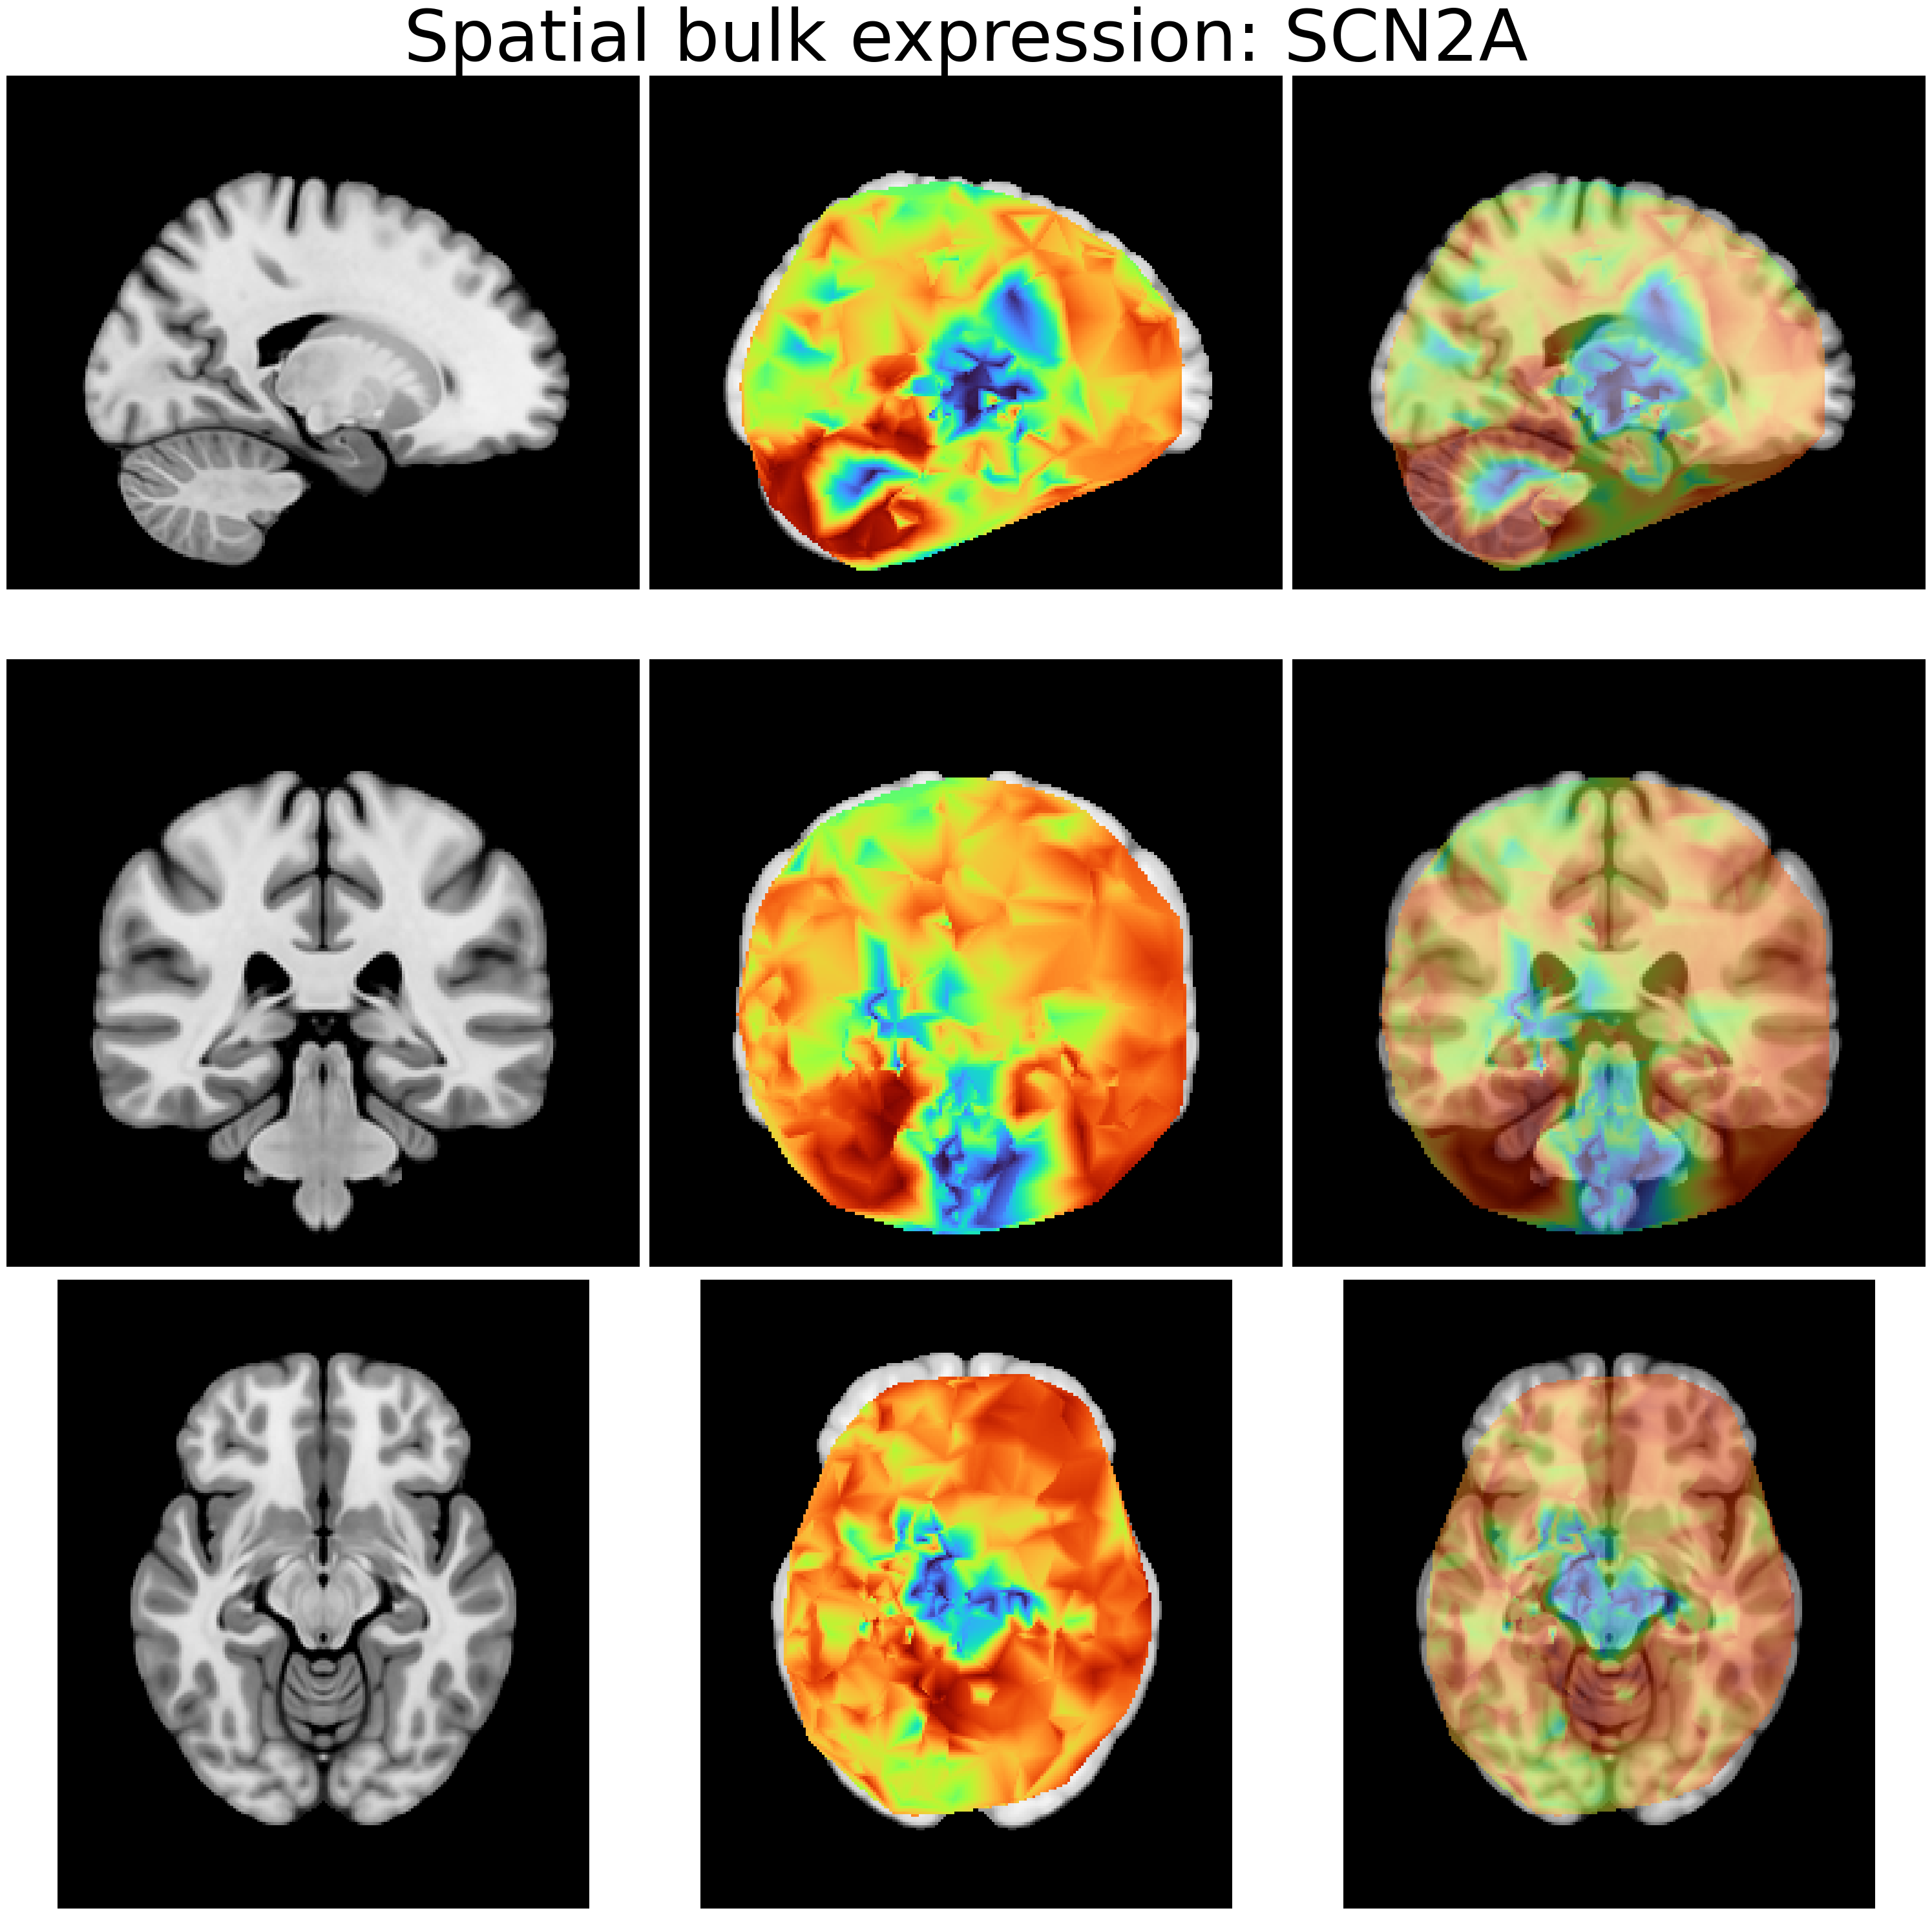

In [6]:


# Define bounding box from your coordinates
#x_min, x_max = coords['x'].min(), coords['x'].max()
#y_min, y_max = coords['y'].min(), coords['y'].max()
#z_min, z_max = coords['z'].min(), coords['z'].max()

# Define bounding box from your coordinates
# Load MNI atlas
mni_output_path = os.path.join(directory1, 'MNI152_T1_1mm.nii.gz')
print(f"Loading MNI atlas from {mni_output_path}")
mni_img = nb.load(mni_output_path)
mni_vol = np.array(mni_img.dataobj)
affine = mni_img.affine

interp = interpolate_expression_3d(coords, single_gene)

grid_values, X, Y, Z = make_3d_interpolated_grid_mni(
    interp_func=interp,
    mni_img=mni_img,
    resolution=1  # adjust if needed
)

# Plot interpolated expression map 
fig = plot_volumetrics(gene_name, mni_vol, grid_values, sections=[80, 100, 60])
plt.show()



Saving interpolated expression SCN2A


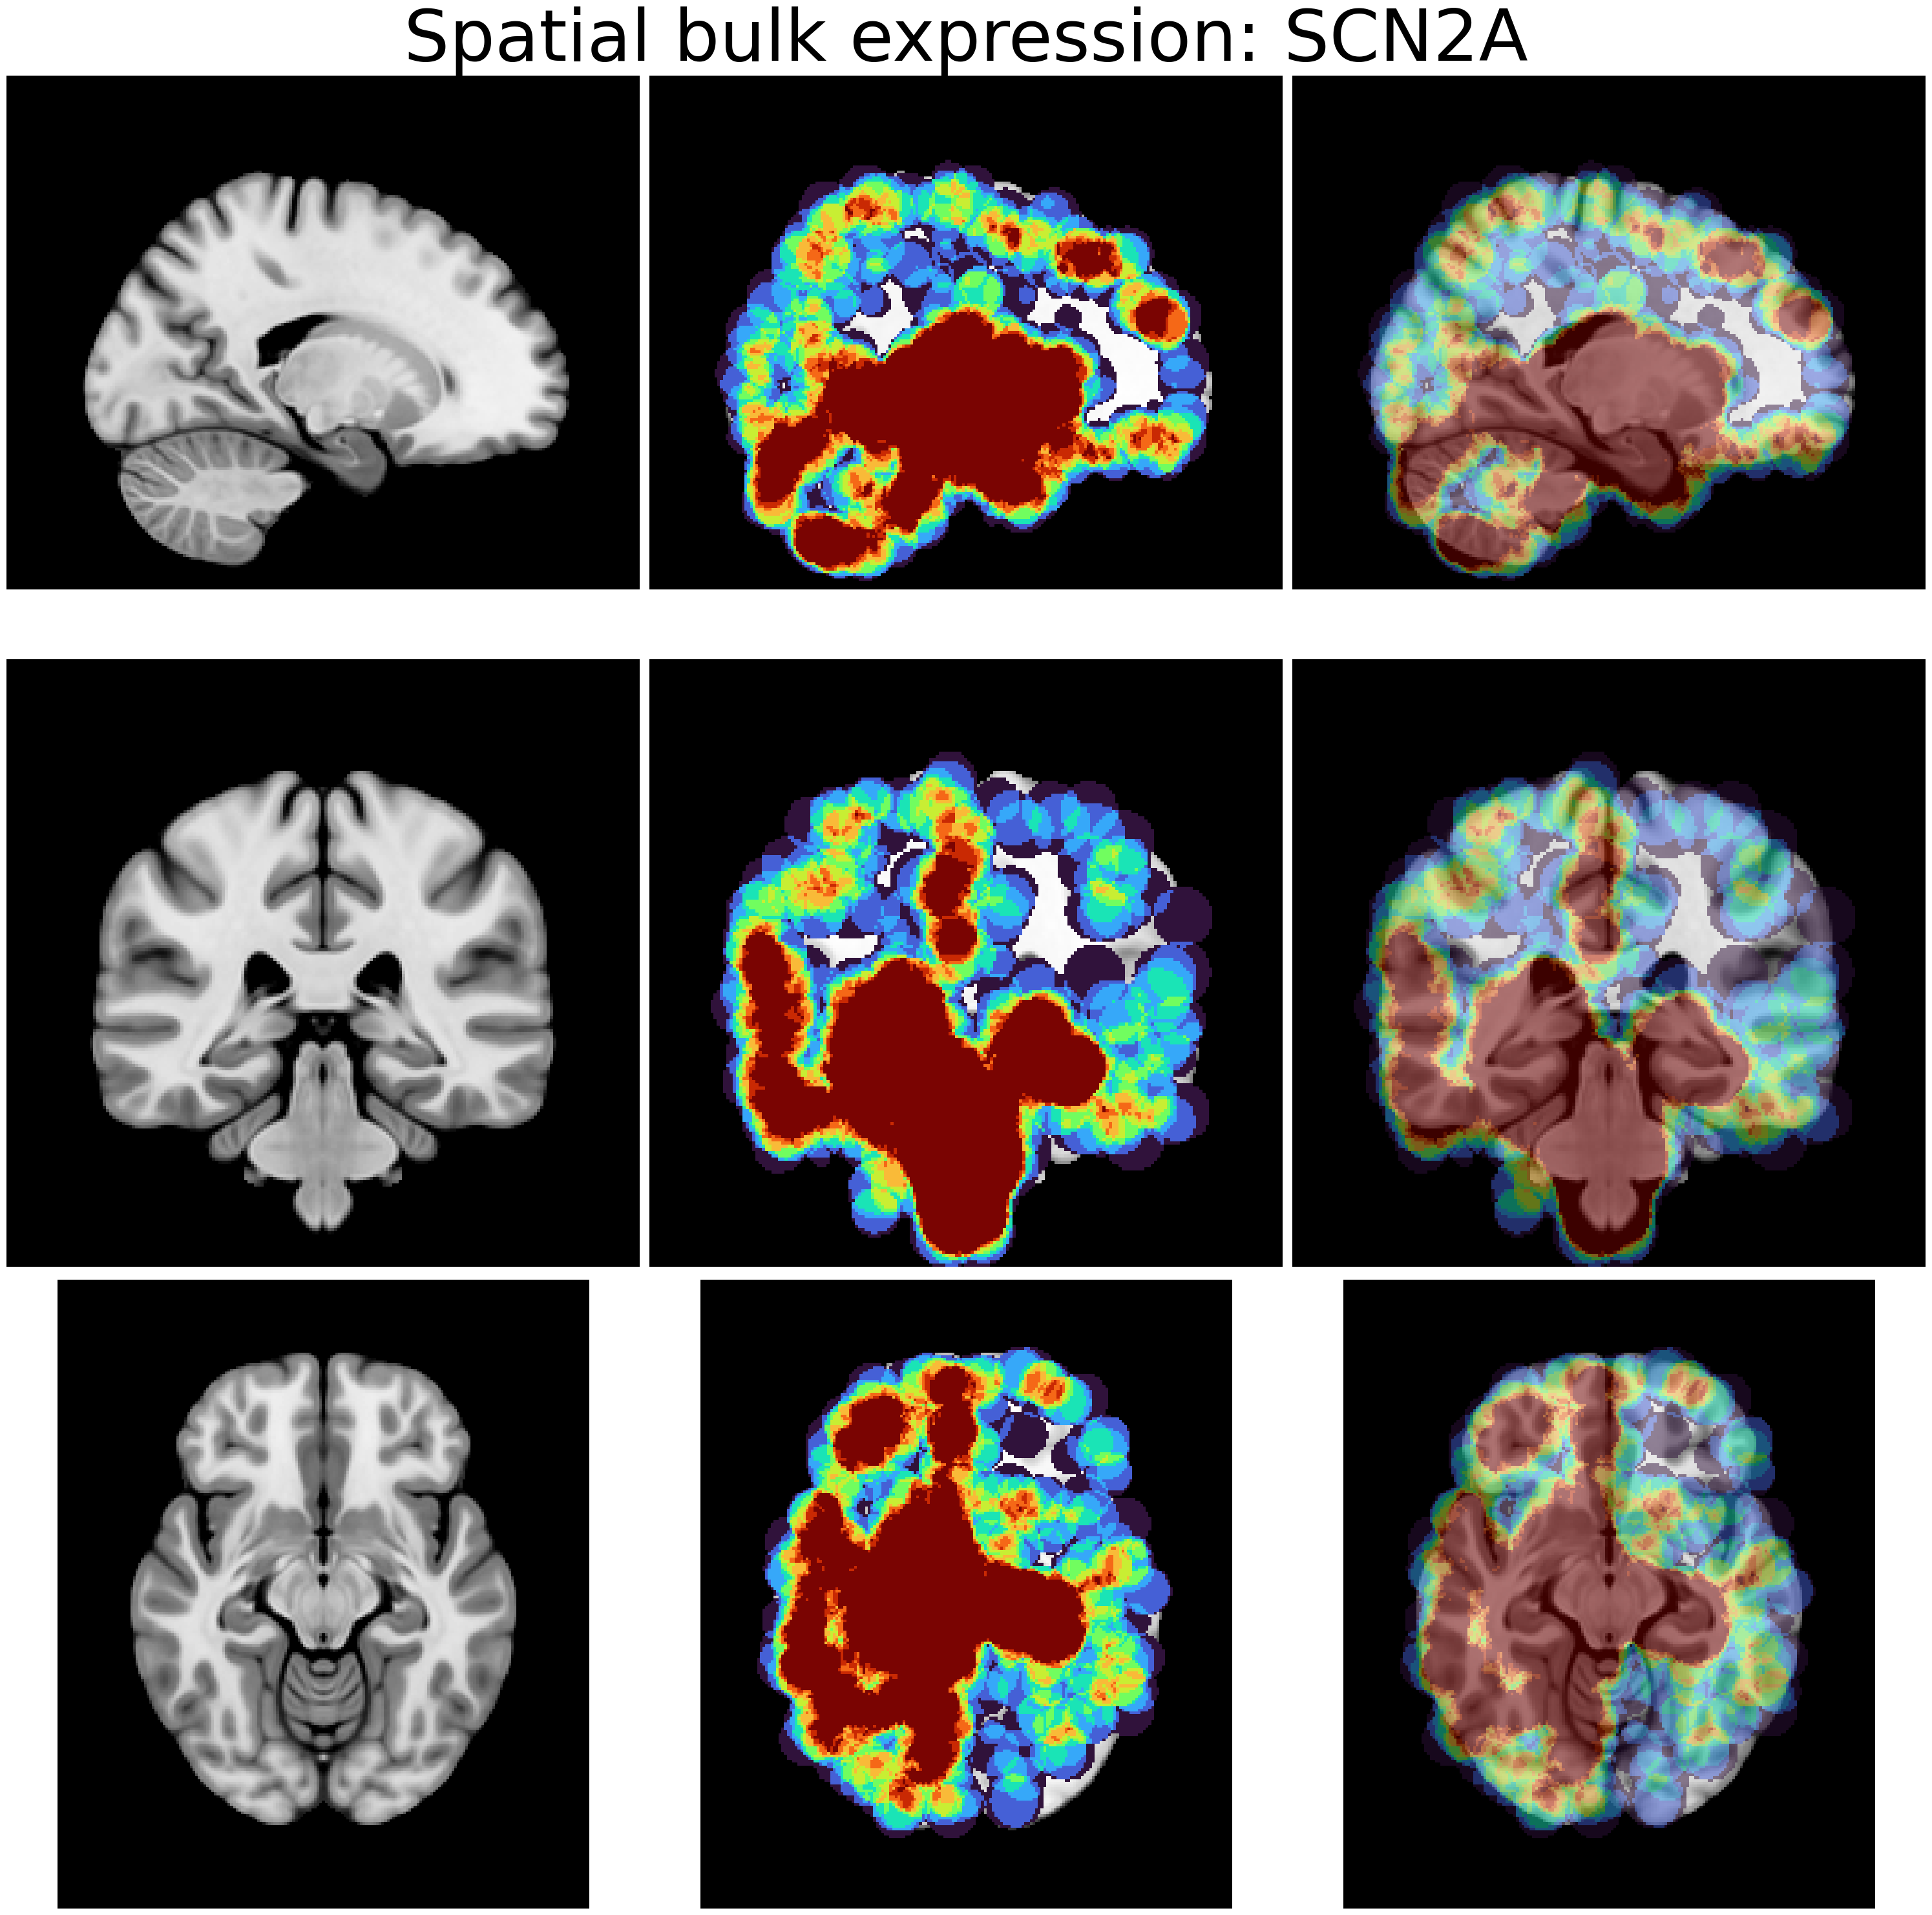

In [7]:
print(f"Saving interpolated expression {gene_name}")
density_output_path =  os.path.join(directory1, f'{gene_name}_linear_interp_expression.nii.gz')
gene_img = nb.Nifti1Image(grid_values, affine=mni_img.affine)
nb.save(gene_img, density_output_path)

##

min_distance_vol = get_point_density(coords=coords,search_radius=10,search_k=10,mni_img=mni_img,resolution=1)
min_distance_vol = min_distance_vol.astype(np.float32)

# Plot sample density map
fig = plot_volumetrics(gene_name, mni_vol, min_distance_vol, sections=[80, 100, 60])
plt.show()



Saving sample density SCN2A


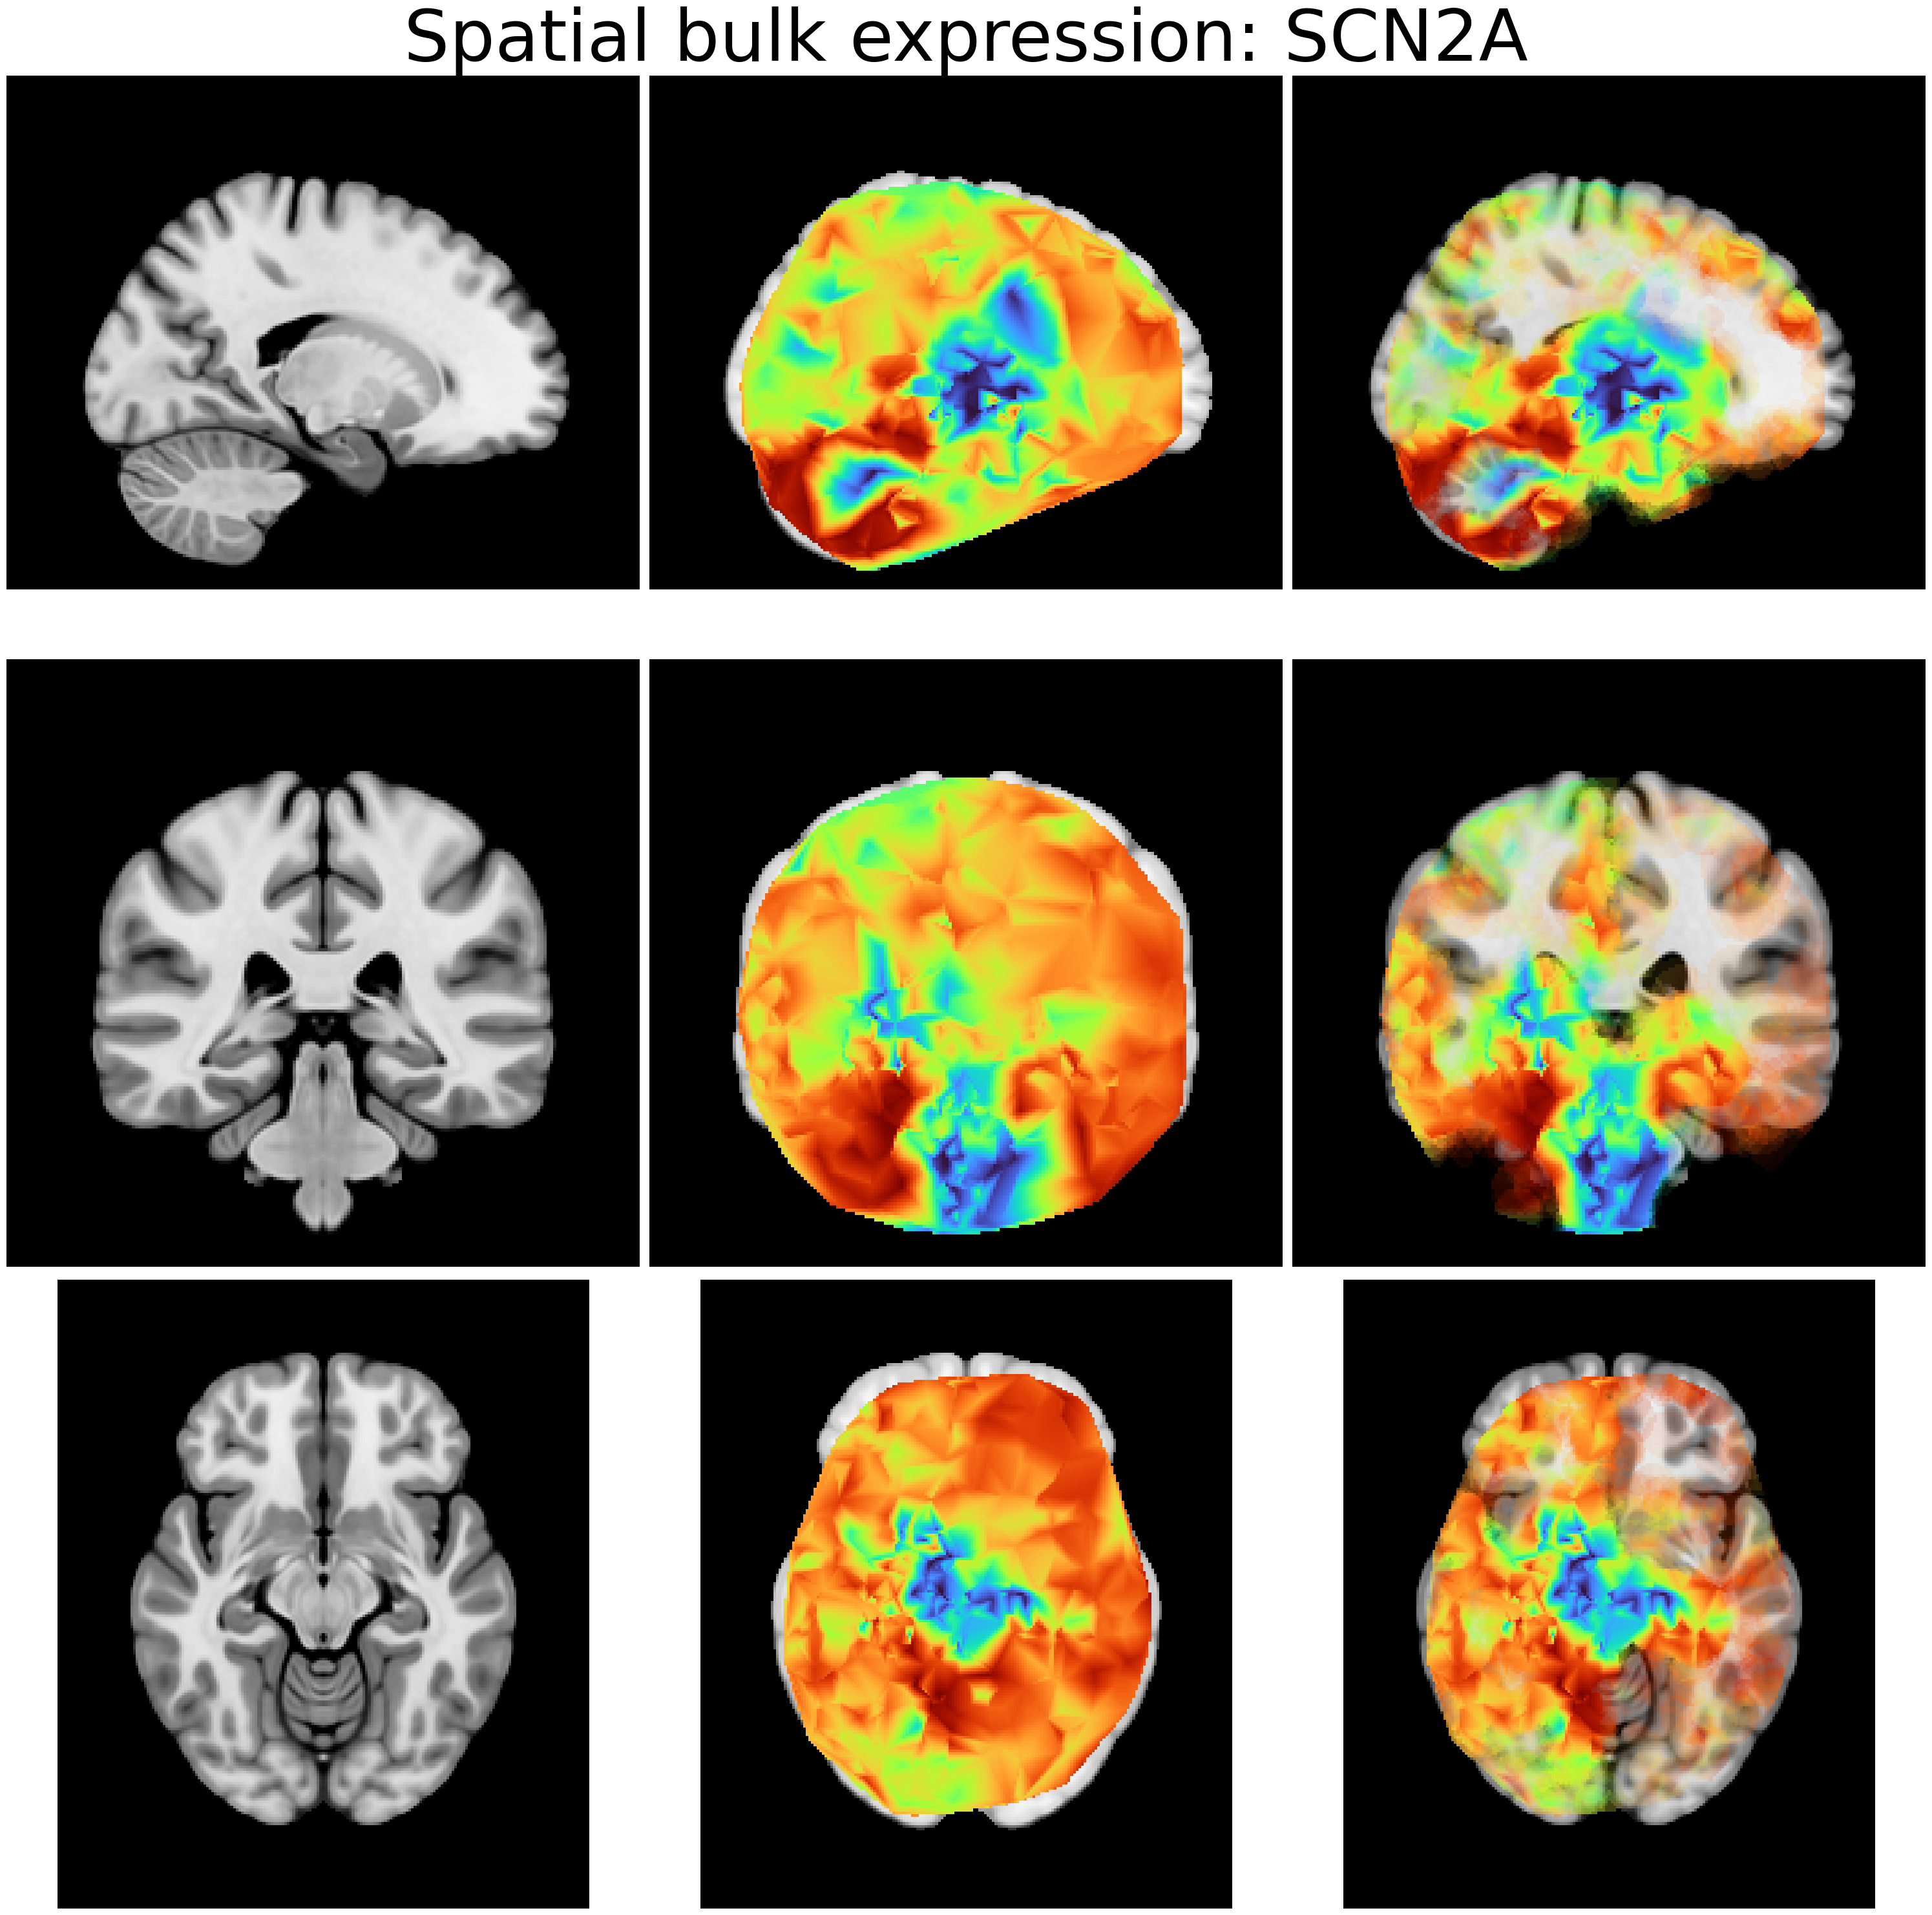

In [8]:
print(f"Saving sample density {gene_name}")
density_output_path =  os.path.join(directory1, f'{gene_name}_sample_density.nii.gz')
gene_img = nb.Nifti1Image(min_distance_vol, affine=mni_img.affine)
nb.save(gene_img, density_output_path)

##

# Plot sample density map
alpha_mask = (min_distance_vol-np.min(min_distance_vol)) / np.max(min_distance_vol)
fig = plot_volumetrics_alpha(gene_name, mni_vol, grid_values, alpha_mask, sections=[80, 100, 60])
plt.show()



In [ ]:

# Visualise data in meshes - Mathilde
# Visualise data in slice of MRI - Jack